# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 19.06 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

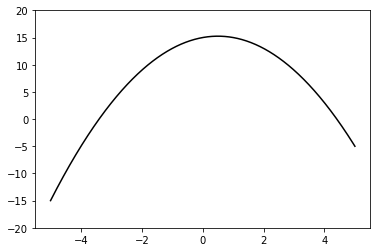

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

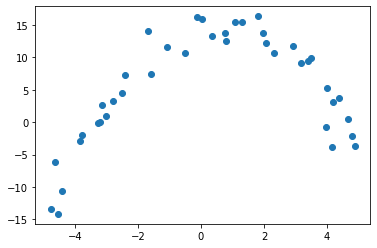

In [6]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)
    

(3.98173121357879, 5.336382904254359)
(-1.087039497653751, 11.572117170027912)
(2.0528339985440622, 12.252654244338753)
(3.4948596518636705, 9.887928796750838)
(3.950389674266752, -0.7886240883010993)
(0.796950107456059, 12.545900209788488)
(-0.49436893368844803, 10.687314649720424)
(4.169412179474561, -3.8654142672382648)
(2.9332508413022413, 11.7234803760056)
(-0.13555798030833177, 16.20915681152103)
(1.301473404114728, 15.447143194554002)
(2.3148922079084775, 10.722169638004173)
(-3.82865706791482, -2.83062457729632)
(-1.6746385078034454, 14.018163224732104)
(3.1591309653365958, 9.086752970716235)
(1.976706401912388, 13.73415171456724)
(-4.547659321343876, -14.153759570475154)
(0.34197968260723943, 13.260293417216214)
(1.8058913256225653, 16.34431146793603)
(1.063384177542189, 15.40667108018044)
(0.7595294803154076, 13.691649234574514)
(4.805166506472688, -2.0699652704115747)
(-4.636079623885142, -6.081231029377605)
(-3.150280586025617, 2.6159785428026052)
(-3.761048355755683, -2.02

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [20]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=X.reshape(-1, 1)
    X=poly.fit_transform(X)

    return X
X_poly=addPoly(X,200)

In [21]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.98173121e+000 1.58541835e+001 6.31270971e+001 2.51355133e+002
 1.00082858e+003 3.98503039e+003 1.58673199e+004 6.31794029e+004
 2.51563401e+005 1.00165784e+006 3.98833231e+006 1.58804672e+007
 6.32317521e+007 2.51771841e+008 1.00248780e+009 3.99163695e+009
 1.58936255e+010 6.32841446e+010 2.51980454e+011 1.00331844e+012
 3.99494434e+012 1.59067946e+013 6.33365805e+013 2.52189240e+014
 1.00414977e+015 3.99825447e+015 1.59199746e+016 6.33890599e+016
 2.52398198e+017 1.00498178e+018 4.00156734e+018 1.59331656e+019
 6.34415827e+019 2.52607330e+020 1.00581449e+021 4.00488295e+021
 1.59463675e+022 6.34941491e+022 2.52816635e+023 1.00664789e+024
 4.00820132e+024 1.59595803e+025 6.35467590e+025 2.53026114e+026
 1.00748198e+027 4.01152243e+027 1.59728041e+028 6.35994125e+028
 2.53235766e+029 1.00831675e+030 4.01484629e+030 1.59860388e+031
 6.36521097e+031 2.53445592e+032 1.00915222e+033 4.01817291e+033
 1.59992845e+034 6.37048505e+034 2.53655592e+035 1.00998839e+036
 4.02150229e+03

## Splitting data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=.2)

In [24]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [26]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Training error (rmse): 8.3837203469239e-07
Testing error (rmse): 26291575735.959408


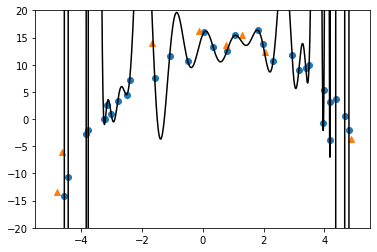

Polynomial coefficients
[15.55838980595534, 12.346462819496727, -56.63301368804327, -70.05670532757834, 212.9194195869356, 95.16884090423368, -289.05765861596814, -43.849049646771, 187.02633702638033, 3.655250513897949, -66.04622338704424, 3.0735669913739425, 13.494463441769563, -1.1098149727550977, -1.578206716144053, 0.16143417694517653, 0.09193671998399912, -0.010323657014680411, -0.0008166434754145639, 6.903769824109577e-05, -0.00013872139136029098, 1.8469509077098587e-05, 3.149946213843478e-07, 5.0070236303016203e-08, 2.3405462125297376e-07, -3.219931955594591e-08, 6.9058709115022576e-09, -1.2002690609987544e-09, -1.0925673606015876e-10, 5.9761843571719485e-12, -1.6495943306755053e-11, 2.434154219545568e-12, -6.798947121193156e-13, 1.2372795229243935e-13, -1.1328461132119933e-14, 3.071828338446028e-15, 4.3123560373527866e-16, -2.387396340338252e-17, 4.5604909525805105e-17, -6.985759849968455e-18, 2.2861031982281243e-18, -4.385875525552972e-19, 8.082055525355179e-20, -1.88562631164

In [27]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [39]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(normalize=True,alpha=0.1).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Training error (rmse): 2.3190568529612943
Testing error (rmse): 2.834983995718384


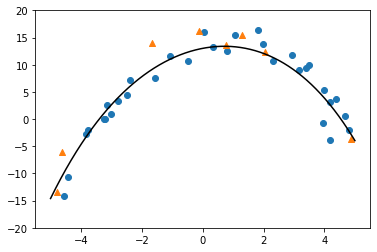

Polynomial coefficients
[13.013759030797774, 1.0646146485403425, -0.7444675856814591, 0.0, -0.005904572784711794, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [40]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [32]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg =linear_model.Ridge(normalize=True,alpha=0.1).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Training error (rmse): 2.1300877558697584
Testing error (rmse): 17.52446776537137


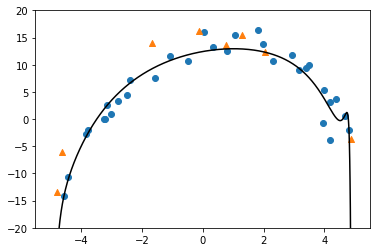

Polynomial coefficients
[12.425805383299668, 0.9947532963480732, -0.48235717298365194, 0.014557970466695018, -0.012832094007400154, -0.00013884524467970363, -0.0003424463302320283, -1.7815912051676863e-05, -8.743485312130912e-06, -7.129904719110619e-07, -1.9634694555735212e-07, -1.7333529313572785e-08, -2.980567101552726e-09, -5.605741524732513e-11, 3.3814220020054616e-11, 2.424032626322286e-11, 5.977601234981885e-12, 1.922170642921011e-12, 3.7033676643010156e-13, 1.0802796432396633e-13, 1.817413781893135e-14, 5.257557659432215e-15, 7.970882293365309e-16, 2.358669876316452e-16, 3.2569424557267937e-17, 1.0034089025430033e-17, 1.2626491206223838e-18, 4.1102724252421254e-19, 4.6819653227111244e-20, 1.636160512269429e-20, 1.6636731708214188e-21, 6.365923206942722e-22, 5.644234071040617e-23, 2.4299739156757596e-23, 1.8076871699030923e-24, 9.121583925151862e-25, 5.323375334673985e-26, 3.3716540447983404e-26, 1.3471376220568404e-27, 1.2277751524358827e-27, 2.2545986331182898e-29, 4.4028350404

In [33]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [41]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,4.882351,-3.729068,-6.977677e+10,-2.889651,-50.644013
1,2.052834,12.252654,1.155010e+01,11.957096,12.296242
2,-0.135558,16.209157,1.308436e+01,12.855760,12.282054
3,-1.674639,14.018163,2.025484e+01,9.096681,9.232369
4,1.301473,15.447143,1.407473e+01,13.121382,12.896316
5,0.759529,13.691649,1.198173e+01,13.390928,12.905089
6,-4.636080,-6.081231,6.871790e+08,-10.650567,-16.427899
7,-4.772174,-13.371921,2.570420e+10,-12.083351,-23.537398
